***Data Cleaning :***


In [1]:
import pandas as pd

file_path = 'UPfall_DataSet1.csv'
data = pd.read_csv(file_path)

In [2]:
data.head()

,TimeStamps,Ankle_Acc_X,Ankle_Acc_Y,Ankle_Acc_Z,Ankle_Gyro_X,Ankle_Gyro_Y,Ankle_Gyro_Z,Pocket_Acc_X,Pocket_Acc_Y,Pocket_Acc_Z,...,Wrist_Acc_X,Wrist_Acc_Y,Wrist_Acc_Z,Wrist_Gyro_X,Wrist_Gyro_Y,Wrist_Gyro_Z,Subject,Activity,Trial,Tag
0,2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,...,-1.240,-0.557,0.227,-75.854,44.024,315.915,1,1,1,7
1,2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,...,-1.240,-0.557,0.227,-28.780,55.549,344.146,1,1,1,7
2,2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,...,-1.884,-0.687,0.251,27.256,87.134,372.012,1,1,1,7
3,2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,...,-1.884,-0.687,0.251,2.866,117.683,356.463,1,1,1,7
4,2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,...,-1.597,-0.646,0.112,10.000,30.671,126.768,1,1,1,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamps     294678 non-null  object 
 1   Ankle_Acc_X    294678 non-null  float64
 2   Ankle_Acc_Y    294678 non-null  float64
 3   Ankle_Acc_Z    294678 non-null  float64
 4   Ankle_Gyro_X   294678 non-null  float64
 5   Ankle_Gyro_Y   294678 non-null  float64
 6   Ankle_Gyro_Z   294678 non-null  float64
 7   Pocket_Acc_X   258569 non-null  float64
 8   Pocket_Acc_Y   258569 non-null  float64
 9   Pocket_Acc_Z   258569 non-null  float64
 10  Pocket_Gyro_X  258569 non-null  float64
 11  Pocket_Gyro_Y  258569 non-null  float64
 12  Pocket_Gyro_Z  258569 non-null  float64
 13  Waist_Acc_X    294678 non-null  float64
 14  Waist_Acc_Y    294678 non-null  float64
 15  Waist_Acc_Z    294678 non-null  float64
 16  Waist_Gyro_X   294678 non-null  float64
 17  Waist_Gyro_Y   294678 non-nul

***Handle Missing Data***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())

# # Visualize missing data pattern
# plt.figure(figsize=(12, 6))
# sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
# plt.title('Missing Data Heatmap')
# plt.show()


TimeStamps           0
Ankle_Acc_X          0
Ankle_Acc_Y          0
Ankle_Acc_Z          0
Ankle_Gyro_X         0
Ankle_Gyro_Y         0
Ankle_Gyro_Z         0
Pocket_Acc_X     36109
Pocket_Acc_Y     36109
Pocket_Acc_Z     36109
Pocket_Gyro_X    36109
Pocket_Gyro_Y    36109
Pocket_Gyro_Z    36109
Waist_Acc_X          0
Waist_Acc_Y          0
Waist_Acc_Z          0
Waist_Gyro_X         0
Waist_Gyro_Y         0
Waist_Gyro_Z         0
Neck_Acc_X           0
Neck_Acc_Y           0
Neck_Acc_Z           0
Neck_Gyro_X          0
Neck_Gyro_Y          0
Neck_Gyro_Z          0
Wrist_Acc_X          0
Wrist_Acc_Y          0
Wrist_Acc_Z          0
Wrist_Gyro_X         0
Wrist_Gyro_Y         0
Wrist_Gyro_Z         0
Subject              0
Activity             0
Trial                0
Tag                  0
dtype: int64


In [8]:
# # Create a new DataFrame with rows containing missing values removed
# data_cleaned = data.dropna()

# # Alternatively, to modify the original DataFrame directly, use inplace=True
# # data.dropna(inplace=True)

# # 'data_cleaned' now contains the DataFrame with missing value rows removed.
# # If you used 'inplace=True', the original 'data' DataFrame will be modified.

# print("Original DataFrame shape:", data.shape)
# print("Cleaned DataFrame shape:", data_cleaned.shape)

Original DataFrame shape: (294678, 35)
Cleaned DataFrame shape: (258569, 35)


In [5]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data'

# Convert 'TimeStamps' to datetime
data['TimeStamps'] = pd.to_datetime(data['TimeStamps'])

# Set 'TimeStamps' as the index
data.set_index('TimeStamps', inplace=True)

# Apply linear interpolation based on time for Pocket sensor columns
data['Pocket_Acc_X'].interpolate(method='time', inplace=True)
data['Pocket_Acc_Y'].interpolate(method='time', inplace=True)
data['Pocket_Acc_Z'].interpolate(method='time', inplace=True)
data['Pocket_Gyro_X'].interpolate(method='time', inplace=True)
data['Pocket_Gyro_Y'].interpolate(method='time', inplace=True)
data['Pocket_Gyro_Z'].interpolate(method='time', inplace=True)

# Reset the index if needed
data.reset_index(inplace=True)

# Verify no missing values remain
print("Missing Values After Imputation:\n", data.isnull().sum())

Missing Values After Imputation:
 TimeStamps       0
Ankle_Acc_X      0
Ankle_Acc_Y      0
Ankle_Acc_Z      0
Ankle_Gyro_X     0
Ankle_Gyro_Y     0
Ankle_Gyro_Z     0
Pocket_Acc_X     0
Pocket_Acc_Y     0
Pocket_Acc_Z     0
Pocket_Gyro_X    0
Pocket_Gyro_Y    0
Pocket_Gyro_Z    0
Waist_Acc_X      0
Waist_Acc_Y      0
Waist_Acc_Z      0
Waist_Gyro_X     0
Waist_Gyro_Y     0
Waist_Gyro_Z     0
Neck_Acc_X       0
Neck_Acc_Y       0
Neck_Acc_Z       0
Neck_Gyro_X      0
Neck_Gyro_Y      0
Neck_Gyro_Z      0
Wrist_Acc_X      0
Wrist_Acc_Y      0
Wrist_Acc_Z      0
Wrist_Gyro_X     0
Wrist_Gyro_Y     0
Wrist_Gyro_Z     0
Subject          0
Activity         0
Trial            0
Tag              0
dtype: int64


C:\Users\pradip\AppData\Local\Temp\ipykernel_9844\1665856547.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pocket_Acc_X'].interpolate(method='time', inplace=True)
C:\Users\pradip\AppData\Local\Temp\ipykernel_9844\1665856547.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

***Class imbalance Check (ADL Vs Fall)***

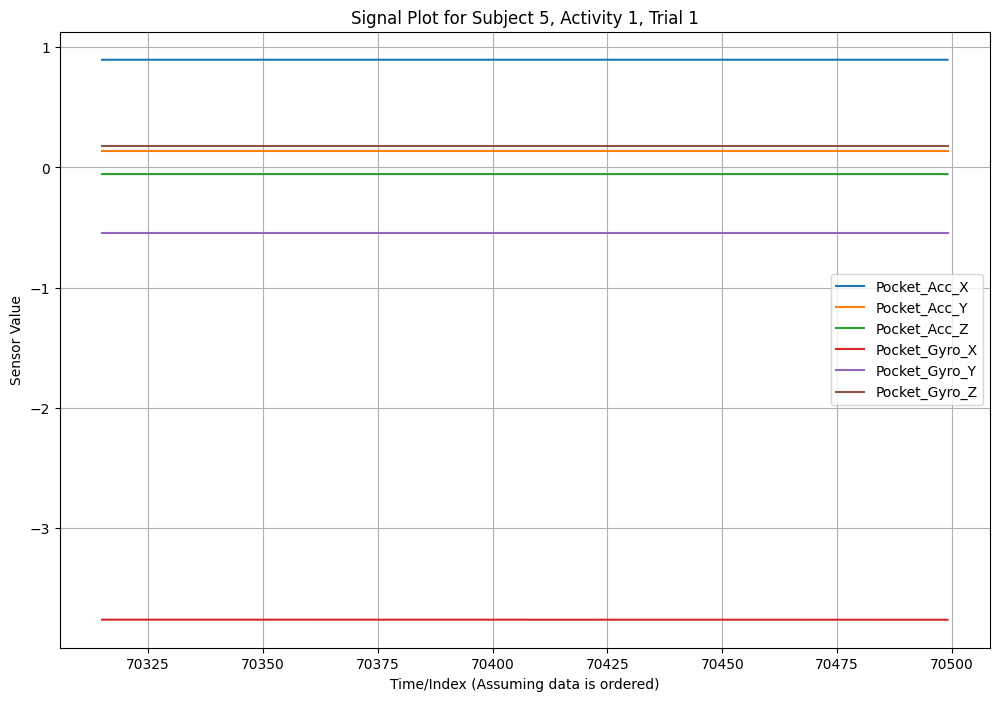

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# Filter data for Subject 5, Activity 1, and Trial 1
filtered_data = data[(data['Subject'] == 5) & (data['Activity'] == 1) & (data['Trial'] == 1)]

# Select the desired Pocket sensor columns
signal_data = filtered_data[['Pocket_Acc_X', 'Pocket_Acc_Y', 'Pocket_Acc_Z',
                              'Pocket_Gyro_X', 'Pocket_Gyro_Y', 'Pocket_Gyro_Z']]

# Check if any data was found for the specified conditions
if not signal_data.empty:
    # Create a signal plot
    plt.figure(figsize=(12, 8))  # Adjust figure size as needed

    # Plot each sensor signal
    plt.plot(signal_data['Pocket_Acc_X'], label='Pocket_Acc_X')
    plt.plot(signal_data['Pocket_Acc_Y'], label='Pocket_Acc_Y')
    plt.plot(signal_data['Pocket_Acc_Z'], label='Pocket_Acc_Z')
    plt.plot(signal_data['Pocket_Gyro_X'], label='Pocket_Gyro_X')
    plt.plot(signal_data['Pocket_Gyro_Y'], label='Pocket_Gyro_Y')
    plt.plot(signal_data['Pocket_Gyro_Z'], label='Pocket_Gyro_Z')

    # Add labels and title
    plt.xlabel("Time/Index (Assuming data is ordered)")
    plt.ylabel("Sensor Value")
    plt.title("Signal Plot for Subject 5, Activity 1, Trial 1")

    # Add a legend
    plt.legend()

    # Add a grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

else:
    print("No data found for Subject 5, Activity 1, and Trial 1.")

In [30]:
# Create a new column 'Class' based on the 'Activity' column
# Convert activity values to int and map: 1-5 as "Fall", 6-11 as "ADL"
data['Activity'] = data['Activity'].astype(int)
data['Class'] = data['Activity'].apply(lambda x: 'Fall' if 1 <= x <= 5 else 'ADL')

# Display the first few rows to verify the new column
data[['Activity', 'Class']].head()


,Activity,Class
0,1,Fall
1,1,Fall
2,1,Fall
3,1,Fall
4,1,Fall


In [38]:
# Count the number of instances for each class (ADL vs Fall)
class_counts = data['Class'].value_counts()

print("Class Distribution:")
print(class_counts)


Class Distribution:
Class
ADL     248727
Fall     45951
Name: count, dtype: int64


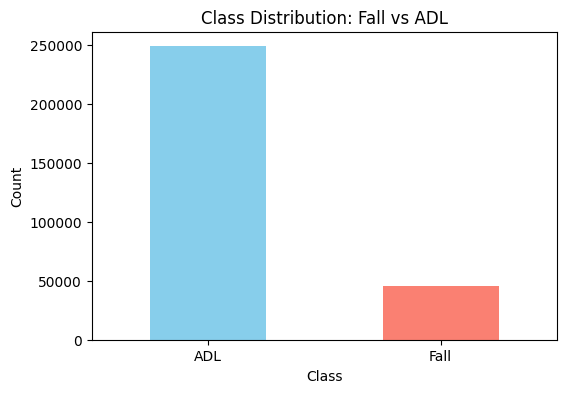

In [32]:
import matplotlib.pyplot as plt

# Plot the class distribution using a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Fall vs ADL')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


***Strategies to Address Class Imbalance***

1.   **SMOTE Oversampling:** Balances the dataset by synthetically generating new minority samples.
2.   **Stratified Splitting:** Maintains the original class distribution across splits (helpful for evaluation).
3. **Random Splitting:** Does not preserve class distribution and might yield uneven splits.



In [33]:
# Prepare the feature matrix (X) and target vector (y)
# Adjust column names as needed: here, we drop 'Class' (target) and 'Activity' if present.
X = data.drop(columns=['Class', 'Activity'], errors='ignore')
y = data['Class']

# Check the original class distribution
print("Original Class Distribution:")
print(y.value_counts())


Original Class Distribution:
Class
ADL     248727
Fall     45951
Name: count, dtype: int64


In [34]:
print("Missing Values After Imputation:\n", data.isnull().sum())

Missing Values After Imputation:
 TimeStamps       0
Ankle_Acc_X      0
Ankle_Acc_Y      0
Ankle_Acc_Z      0
Ankle_Gyro_X     0
Ankle_Gyro_Y     0
Ankle_Gyro_Z     0
Pocket_Acc_X     0
Pocket_Acc_Y     0
Pocket_Acc_Z     0
Pocket_Gyro_X    0
Pocket_Gyro_Y    0
Pocket_Gyro_Z    0
Waist_Acc_X      0
Waist_Acc_Y      0
Waist_Acc_Z      0
Waist_Gyro_X     0
Waist_Gyro_Y     0
Waist_Gyro_Z     0
Neck_Acc_X       0
Neck_Acc_Y       0
Neck_Acc_Z       0
Neck_Gyro_X      0
Neck_Gyro_Y      0
Neck_Gyro_Z      0
Wrist_Acc_X      0
Wrist_Acc_Y      0
Wrist_Acc_Z      0
Wrist_Gyro_X     0
Wrist_Gyro_Y     0
Wrist_Gyro_Z     0
Subject          0
Activity         0
Trial            0
Tag              0
Class            0
dtype: int64


In [35]:
print("Missing Values in X:\n", X.isnull().sum().sum()) # Should be 0


Missing Values in X:
 0


In [36]:
print("Missing Values in cleaned_data:\n", data.isnull().sum().sum())  # Should be 0


Missing Values in cleaned_data:
 0


In [37]:
X['TimeStamps'] = pd.to_datetime(X['TimeStamps']).astype('int64') / 10**9

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Display the new class distribution
print("Class Distribution After SMOTE:", Counter(y_sm))


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

*Now, we check that amongs SMOTE, Stratified and Splitting which method gives the higher accuracy.*

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# SMOTE Oversampling
X_sm, y_sm = SMOTE(random_state=42).fit_resample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# Stratified Splitting
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Random Splitting
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training and Evaluation Function
def evaluate_model(X_train, X_test, y_train, y_test, method_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{method_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='Fall'):.4f}")
    print(classification_report(y_test, y_pred))

# Evaluate All Methods
evaluate_model(X_train_sm, X_test_sm, y_train_sm, y_test_sm, "SMOTE Oversampling")
evaluate_model(X_train_strat, X_test_strat, y_train_strat, y_test_strat, "Stratified Splitting")
evaluate_model(X_train_rand, X_test_rand, y_train_rand, y_test_rand, "Random Splitting")



SMOTE Oversampling Results:
Accuracy: 0.9997
F1 Score: 0.9997
              precision    recall  f1-score   support

         ADL       1.00      1.00      1.00     74446
        Fall       1.00      1.00      1.00     74791

    accuracy                           1.00    149237
   macro avg       1.00      1.00      1.00    149237
weighted avg       1.00      1.00      1.00    149237


Stratified Splitting Results:
Accuracy: 0.9984
F1 Score: 0.9949
              precision    recall  f1-score   support

         ADL       1.00      1.00      1.00     74619
        Fall       1.00      0.99      0.99     13785

    accuracy                           1.00     88404
   macro avg       1.00      1.00      1.00     88404
weighted avg       1.00      1.00      1.00     88404


Random Splitting Results:
Accuracy: 0.9985
F1 Score: 0.9950
              precision    recall  f1-score   support

         ADL       1.00      1.00      1.00     74581
        Fall       1.00      0.99      1.00     

**Section-2** : Time Windowing

In [41]:
import pandas as pd
import numpy as np

# Ensure timestamp is in seconds (if needed)
data['TimeStamps'] = pd.to_datetime(data['TimeStamps'])

# Function to create sliding windows
def create_windows(data, window_size, overlap):
    step_size = int(window_size * (1 - overlap))
    windows = []

    for start in range(0, len(data) - window_size + 1, step_size):
        window = data.iloc[start:start + window_size].copy()
        window['Window_ID'] = start // step_size  # Assign unique ID for grouping
        windows.append(window)

    return pd.concat(windows)

# Define window sizes and overlap
window_sizes = [50, 100, 150]  # Assuming 50Hz sampling rate for 1s, 2s, 3s
overlap = 0.5

# Create sliding windows
data_1s = create_windows(data, window_size=window_sizes[0], overlap=overlap)
data_2s = create_windows(data, window_size=window_sizes[1], overlap=overlap)
data_3s = create_windows(data, window_size=window_sizes[2], overlap=overlap)

# Save the results
data_1s.to_csv("data_window_1s.csv", index=False)
data_2s.to_csv("data_window_2s.csv", index=False)
data_3s.to_csv("data_window_3s.csv", index=False)


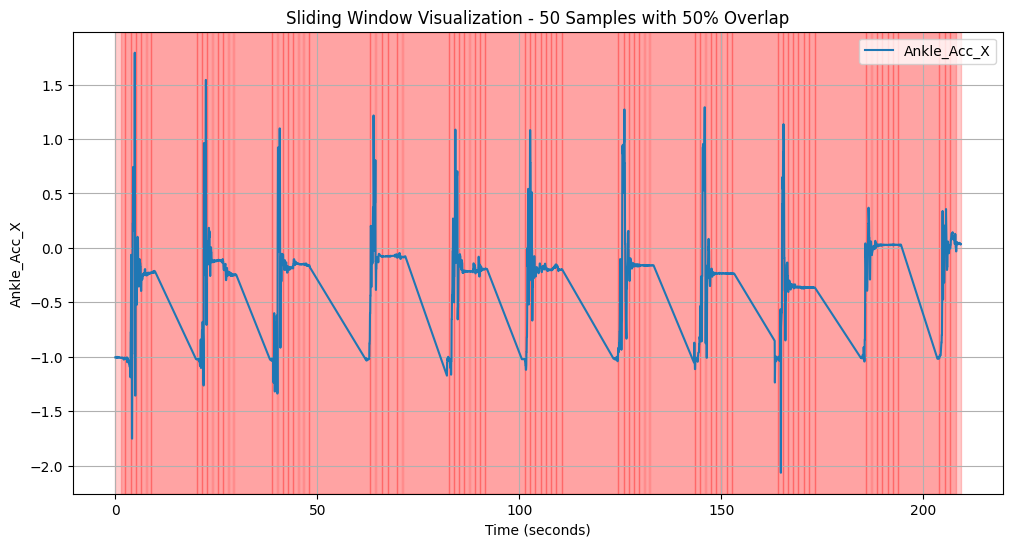

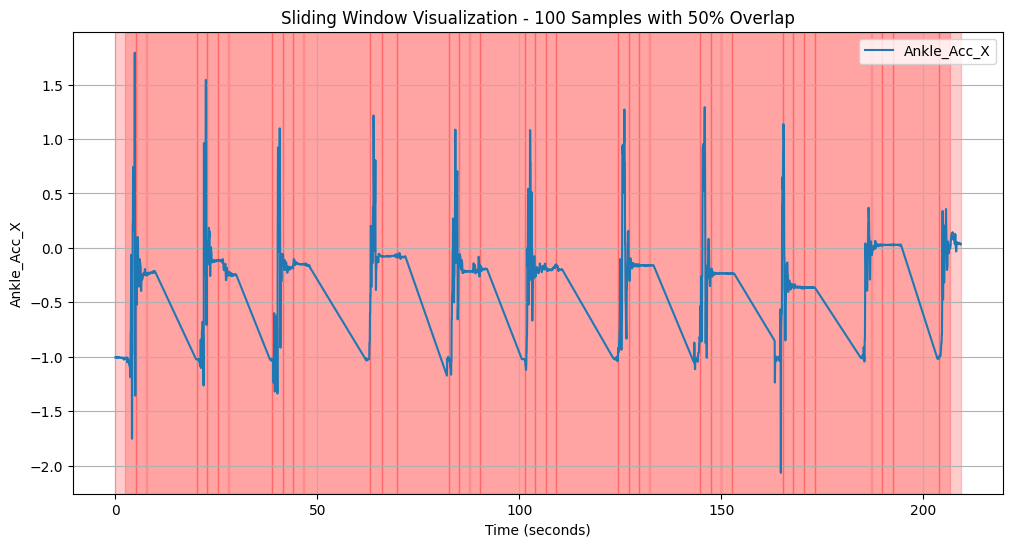

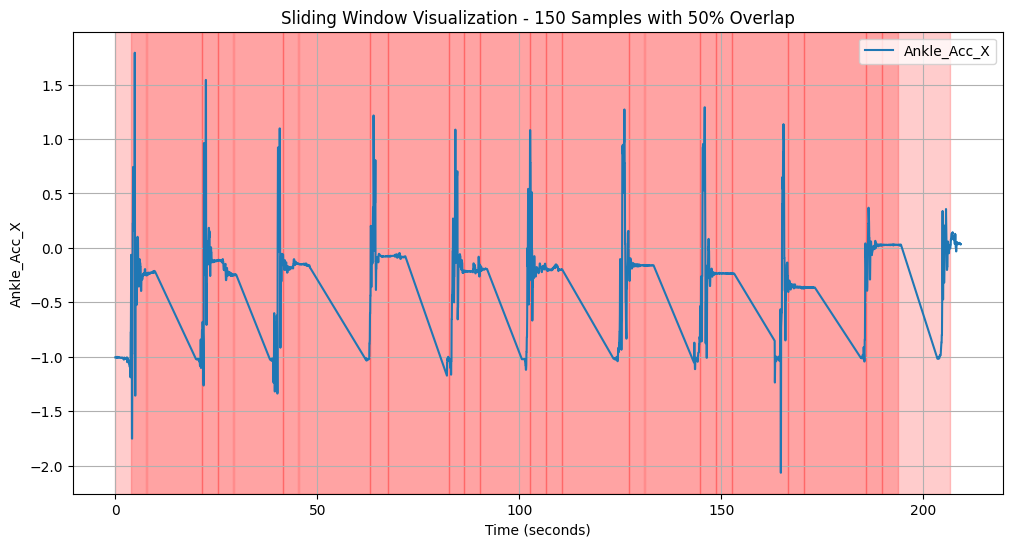

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Correct timestamp conversion to seconds
data['TimeStamps'] = pd.to_datetime(data['TimeStamps'])
data['Time_Seconds'] = (data['TimeStamps'] - data['TimeStamps'].min()).dt.total_seconds()

# Improved Sliding Window Visualization
def visualize_windows(data, window_size, overlap, sensor_column='Ankle_Acc_X'):
    step_size = int(window_size * (1 - overlap))

    # Use a subset for clearer visualization
    subset = data.iloc[:2000]  # Visualizing first 2000 samples

    plt.figure(figsize=(12, 6))
    plt.plot(subset['Time_Seconds'], subset[sensor_column], label=sensor_column)

    # Highlight window regions for better clarity
    for start in range(0, len(subset) - window_size + 1, step_size):
        plt.axvspan(subset['Time_Seconds'].iloc[start],
                    subset['Time_Seconds'].iloc[start + window_size - 1],
                    color='red', alpha=0.2)

    plt.title(f'Sliding Window Visualization - {window_size} Samples with 50% Overlap')
    plt.xlabel('Time (seconds)')
    plt.ylabel(sensor_column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize for 1s, 2s, and 3s windows
visualize_windows(data, window_size=50, overlap=0.5)   # For 1s window
visualize_windows(data, window_size=100, overlap=0.5)  # For 2s window
visualize_windows(data, window_size=150, overlap=0.5)  # For 3s window


**Section 3 :** Feature Selection

Time-Domain Feature Extraction :

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

def extract_time_domain_features(window):
    # Enhanced variance and identical values check
    if np.var(window, axis=0).max() < 1e-6 or np.allclose(window, window.iloc[0], atol=1e-4):
        return pd.Series({})

    features = {
        'mean': np.mean(window, axis=0),
        'std': np.std(window, axis=0),
        'rms': np.sqrt(np.mean(np.square(window), axis=0)),
        'skewness': skew(window, axis=0, nan_policy='omit'),
        'kurtosis': kurtosis(window, axis=0, nan_policy='omit'),
        'energy': np.sum(np.square(window), axis=0),
        'peak_to_peak': np.ptp(window, axis=0),
        'zero_crossing_rate': np.sum(np.diff(np.sign(window), axis=0) != 0, axis=0)
    }
    return pd.Series({f'{col}_{name}': value for name, values in features.items() for col, value in zip(window.columns, values)})

# Sliding Window Function
def sliding_window(data, window_size, overlap):
    step = int(window_size * (1 - overlap))
    features_list = []

    for start in range(0, len(data) - window_size + 1, step):
        window = data.iloc[start:start + window_size]
        if window.empty:
            print(f"Empty window found at start index: {start}")
        feature_vector = extract_time_domain_features(window)
        if not feature_vector.empty:
            features_list.append(feature_vector)

    return pd.DataFrame(features_list)


# Select sensor columns (assuming accelerometer and gyroscope data are labeled)
sensor_cols = [col for col in data.columns if 'Acc' in col or 'Gyr' in col]
print(f"Sensor columns found: {sensor_cols}")

if not sensor_cols:
    raise ValueError("No valid sensor columns found. Check column names.")

data_sensor = data[sensor_cols]
print(f"Data Sensor Shape: {data_sensor.shape}")

# Extract features for 1s, 2s, 3s windows with 50% overlap
features_1s = sliding_window(data_sensor, window_size=50, overlap=0.5)  # Assuming 50 samples per second
features_2s = sliding_window(data_sensor, window_size=100, overlap=0.5)
features_3s = sliding_window(data_sensor, window_size=150, overlap=0.5)

# Combine all features
df_features = pd.concat([features_1s, features_2s, features_3s], axis=1)
df_features['Activity'] = data['Activity'][:len(df_features)]  # Align activity labels

# Save feature data to CSV
df_features.to_csv("time_domain_features.csv", index=False)
print("Time-domain feature extraction completed successfully!")


Sensor columns found: ['Ankle_Acc_X', 'Ankle_Acc_Y', 'Ankle_Acc_Z', 'Ankle_Gyro_X', 'Ankle_Gyro_Y', 'Ankle_Gyro_Z', 'Pocket_Acc_X', 'Pocket_Acc_Y', 'Pocket_Acc_Z', 'Pocket_Gyro_X', 'Pocket_Gyro_Y', 'Pocket_Gyro_Z', 'Waist_Acc_X', 'Waist_Acc_Y', 'Waist_Acc_Z', 'Waist_Gyro_X', 'Waist_Gyro_Y', 'Waist_Gyro_Z', 'Neck_Acc_X', 'Neck_Acc_Y', 'Neck_Acc_Z', 'Neck_Gyro_X', 'Neck_Gyro_Y', 'Neck_Gyro_Z', 'Wrist_Acc_X', 'Wrist_Acc_Y', 'Wrist_Acc_Z', 'Wrist_Gyro_X', 'Wrist_Gyro_Y', 'Wrist_Gyro_Z']
Data Sensor Shape: (294678, 30)


<ipython-input-43-2de781d543d5>:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(window, axis=0, nan_policy='omit'),
<ipython-input-43-2de781d543d5>:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': kurtosis(window, axis=0, nan_policy='omit'),


Time-domain feature extraction completed successfully!


Sensor columns found: ['Ankle_Acc_X', 'Ankle_Acc_Y', 'Ankle_Acc_Z', 'Ankle_Gyro_X', 'Ankle_Gyro_Y', 'Ankle_Gyro_Z', 'Pocket_Acc_X', 'Pocket_Acc_Y', 'Pocket_Acc_Z', 'Pocket_Gyro_X', 'Pocket_Gyro_Y', 'Pocket_Gyro_Z', 'Waist_Acc_X', 'Waist_Acc_Y', 'Waist_Acc_Z', 'Waist_Gyro_X', 'Waist_Gyro_Y', 'Waist_Gyro_Z', 'Neck_Acc_X', 'Neck_Acc_Y', 'Neck_Acc_Z', 'Neck_Gyro_X', 'Neck_Gyro_Y', 'Neck_Gyro_Z', 'Wrist_Acc_X', 'Wrist_Acc_Y', 'Wrist_Acc_Z', 'Wrist_Gyro_X', 'Wrist_Gyro_Y', 'Wrist_Gyro_Z']
Data Sensor Shape: (294678, 30)


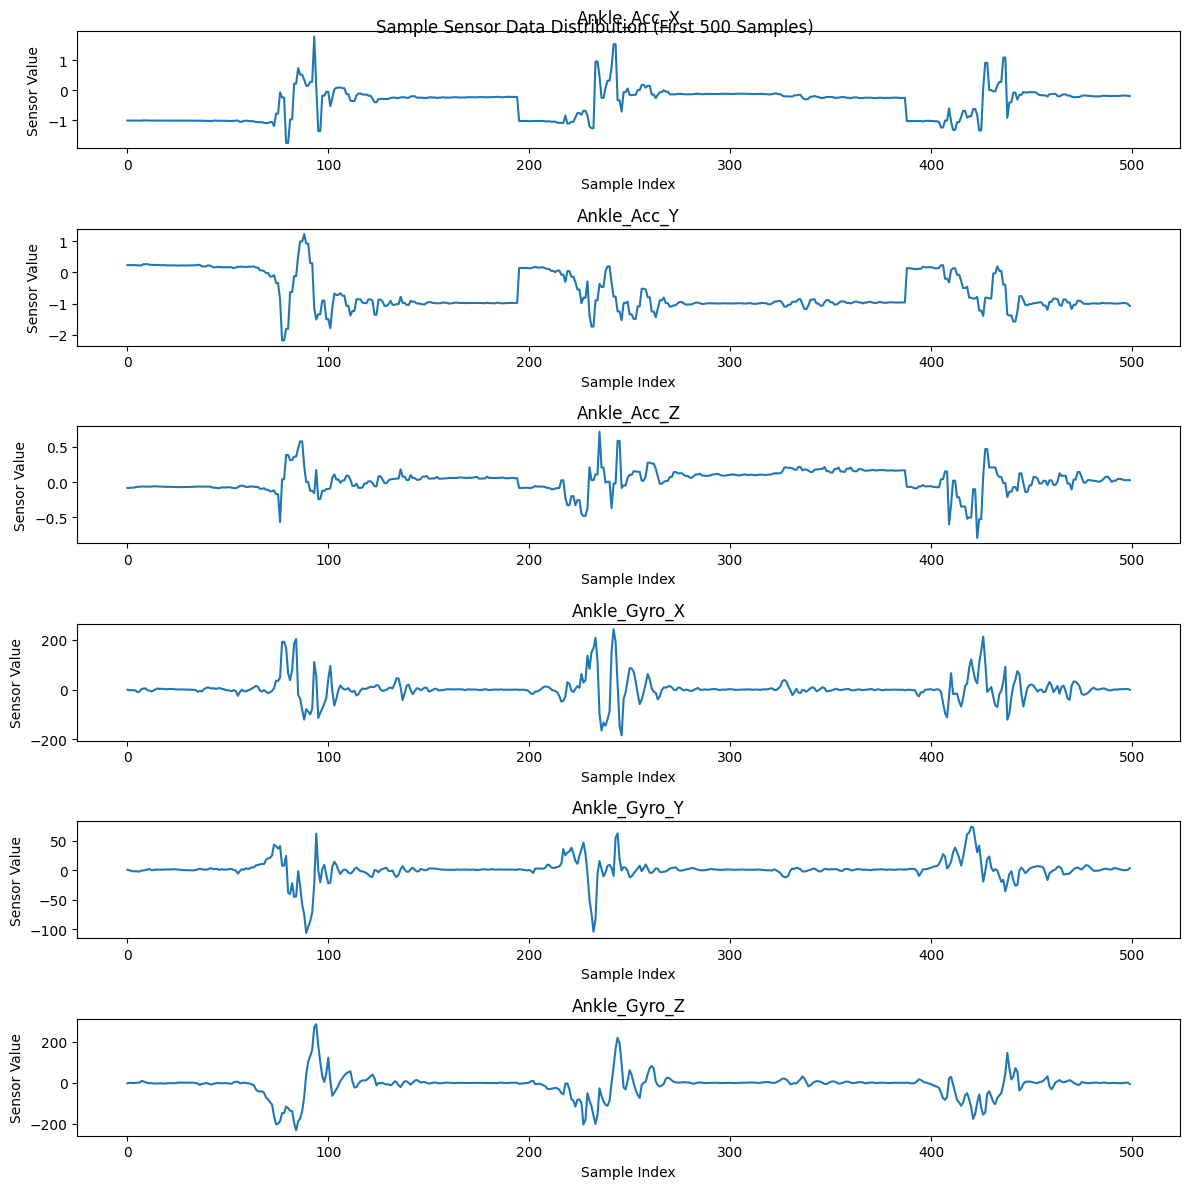

Time-domain feature extraction completed successfully!


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress precision loss warnings

def extract_time_domain_features(window):
    # Enhanced variance and identical values check
    if np.var(window, axis=0).max() < 1e-5 or np.allclose(window, window.iloc[0], atol=1e-4):
        return pd.Series({})

    features = {
        'mean': np.mean(window, axis=0),
        'std': np.std(window, axis=0),
        'rms': np.sqrt(np.mean(np.square(window), axis=0)),
        'skewness': skew(window, axis=0, nan_policy='omit'),
        'kurtosis': kurtosis(window, axis=0, nan_policy='omit'),
        'energy': np.sum(np.square(window), axis=0),
        'peak_to_peak': np.ptp(window, axis=0),
        'zero_crossing_rate': np.sum(np.diff(np.sign(window), axis=0) != 0, axis=0)
    }
    return pd.Series({f'{col}_{name}': value for name, values in features.items() for col, value in zip(window.columns, values)})

# Sliding Window Function
def sliding_window(data, window_size, overlap):
    step = int(window_size * (1 - overlap))
    features_list = []

    for start in range(0, len(data) - window_size + 1, step):
        window = data.iloc[start:start + window_size]
        if window.empty:
            print(f"Empty window found at start index: {start}")
        feature_vector = extract_time_domain_features(window)
        if not feature_vector.empty:
            features_list.append(feature_vector)

    return pd.DataFrame(features_list)


# Select sensor columns (assuming accelerometer and gyroscope data are labeled)
sensor_cols = [col for col in data.columns if 'Acc' in col or 'Gyr' in col]
print(f"Sensor columns found: {sensor_cols}")

if not sensor_cols:
    raise ValueError("No valid sensor columns found. Check column names.")

data_sensor = data[sensor_cols]
print(f"Data Sensor Shape: {data_sensor.shape}")

# Improved Visualization with Subplots and Clearer Labels
plt.figure(figsize=(12, 12))  # Increased figure height to accommodate 6 plots
for i, col in enumerate(sensor_cols[:6]):  # Display first 6 sensor columns
    plt.subplot(6, 1, i + 1)
    plt.plot(data_sensor[col].iloc[:500], label=col)
    plt.title(col)
    plt.xlabel('Sample Index')
    plt.ylabel('Sensor Value')
    plt.tight_layout()
plt.suptitle("Sample Sensor Data Distribution (First 500 Samples)")
plt.show()

# Extract features for 1s, 2s, 3s windows with 50% overlap
features_1s = sliding_window(data_sensor, window_size=50, overlap=0.5)  # Assuming 50 samples per second
features_2s = sliding_window(data_sensor, window_size=100, overlap=0.5)
features_3s = sliding_window(data_sensor, window_size=150, overlap=0.5)

# Combine all features
df_features = pd.concat([features_1s, features_2s, features_3s], axis=1)
df_features['Activity'] = data['Activity'][:len(df_features)]  # Align activity labels

# Save feature data to CSV
df_features.to_csv("time_domain_features.csv", index=False)
print("Time-domain feature extraction completed successfully!")


Frequency-Domain Feature Extraction :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import welch

# Frequency-Domain Feature Extraction
def extract_frequency_domain_features(window, sampling_rate=50):
    features = {}
    for col in window.columns:
        signal = window[col].values
        fft_values = np.abs(fft(signal))
        freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)

        # Power Spectral Density (PSD)
        f, psd_values = welch(signal, fs=sampling_rate)

        # Extract key frequency features
        features.update({
            f'{col}_fft_mean': np.mean(fft_values),
            f'{col}_fft_std': np.std(fft_values),
            f'{col}_fft_energy': np.sum(np.square(fft_values)),
            f'{col}_psd_mean': np.mean(psd_values),
            f'{col}_psd_peak_freq': f[np.argmax(psd_values)],  # Peak frequency in PSD
            f'{col}_spectral_entropy': -np.sum(psd_values * np.log2(psd_values + 1e-10))
        })
    return pd.Series(features)

# Sliding Window Function for Frequency Features
def sliding_window_freq(data, window_size, overlap):
    step = int(window_size * (1 - overlap))
    features_list = []

    for start in range(0, len(data) - window_size + 1, step):
        window = data.iloc[start:start + window_size]
        if not window.empty:
            feature_vector = extract_frequency_domain_features(window)
            features_list.append(feature_vector)

    return pd.DataFrame(features_list)


# Select sensor columns for frequency analysis
sensor_cols = [col for col in data.columns if 'Acc' in col or 'Gyr' in col]
data_sensor = data[sensor_cols]

# Extract features for 1s, 2s, 3s windows with 50% overlap
freq_features_1s = sliding_window_freq(data_sensor, window_size=50, overlap=0.5)
freq_features_2s = sliding_window_freq(data_sensor, window_size=100, overlap=0.5)
freq_features_3s = sliding_window_freq(data_sensor, window_size=150, overlap=0.5)

# Combine all frequency-domain features
df_freq_features = pd.concat([freq_features_1s, freq_features_2s, freq_features_3s], axis=1)
df_freq_features['Activity'] = data['Activity'][:len(df_freq_features)]

# Save feature data to CSV
df_freq_features.to_csv("frequency_domain_features.csv", index=False)
print("Frequency-domain feature extraction completed successfully!")


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch, spectrogram

# Select sensor columns for visualization
sensor_cols = [col for col in data.columns if 'Acc' in col or 'Gyr' in col]
data_sensor = data[sensor_cols]

# Visualizing FFT (Fast Fourier Transform)
plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_cols[:3]):
    signal = data_sensor[col].iloc[:500].values
    N = len(signal)
    T = 1.0 / 50.0  # Assuming 50 Hz sampling frequency
    freq = fftfreq(N, T)
    fft_values = np.abs(fft(signal))

    plt.subplot(3, 1, i + 1)
    plt.plot(freq[:N//2], fft_values[:N//2])  # Plot only positive frequencies
    plt.title(f'FFT Spectrum - {col}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizing Power Spectral Density (PSD)
plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_cols[:3]):
    signal = data_sensor[col].iloc[:500].values
    freq, psd_values = welch(signal, fs=50, nperseg=128)  # 50 Hz sampling frequency

    plt.subplot(3, 1, i + 1)
    plt.semilogy(freq, psd_values)
    plt.title(f'Power Spectral Density - {col}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizing Spectrogram (Time-Frequency Analysis)
plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_cols[:3]):
    signal = data_sensor[col].iloc[:500].values
    f, t, Sxx = spectrogram(signal, fs=50, nperseg=64)

    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(f'Spectrogram - {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Power (dB)')
plt.tight_layout()
plt.show()

**Sensor Fusion :**